In [1]:
import tensorflow as tf
import numpy as np
import glob

In [2]:
def transpose_kernel(kernel):
  return tf.transpose(kernel, (2, 3, 1, 0))

def read_parameter(filename):
    buffer = np.fromfile(filename, np.byte).tobytes()
    dim = np.frombuffer(buffer, dtype=np.int32, count=1, offset=0)[0]
    shape = np.frombuffer(buffer, dtype=np.int32, count=dim, offset=4)
    array = np.frombuffer(buffer, dtype=np.float32, offset=4+4*dim)
    return np.reshape(array, shape)

def read_parameters(filename):
    ws = glob.glob(filename + '_1_*W.bin')
    bs = glob.glob(filename + '_1_*B.bin')
    ws, bs = sorted(ws), sorted(bs)
    
    parameters = []
    for w, b in zip(ws, bs):
        w, b = read_parameter(w), read_parameter(b)
        w = transpose_kernel(w)
        parameters.append((w, b))
    return parameters


In [3]:
path = "/home/pu/workspace/mc-cnn-chainer/mccnn/kitti_fast"
parameters = read_parameters(path)

In [4]:
from mccnn import *
import imageio
test_image_path = "/home/pu/workspace/mc-cnn-chainer/input/mb2014/im0.png"
test_image = imageio.imread(test_image_path)

In [8]:
model = fast_mccnn_model(path="./weights/mccnn")
model.predict(test_image[None])

array([[[[ 0.05312508,  0.43741333,  0.4983788 , ..., -0.19342811,
           0.32528597, -0.1787689 ],
         [ 0.257555  ,  0.27730024,  0.3227095 , ..., -0.05448621,
           0.14277303,  0.1899201 ],
         [ 0.2983128 ,  0.18985885, -0.02235735, ..., -0.23027866,
           0.2909062 ,  0.50063944],
         ...,
         [ 0.34136212,  0.38620138,  0.15637846, ..., -0.13127403,
          -0.5083618 , -0.39431328],
         [ 0.51872545,  0.0112715 , -0.3739667 , ..., -0.2884943 ,
          -0.26791507,  0.03455578],
         [ 0.33287048, -0.09020775, -0.4136976 , ..., -0.03744845,
          -0.01726538,  0.31230706]],

        [[ 0.32842812,  0.19633898,  0.36353737, ...,  0.28035587,
           0.02055904, -0.26006126],
         [ 0.5553193 ,  0.01268103,  0.19308686, ...,  0.12295225,
          -0.49288905, -0.05963987],
         [ 0.6380595 , -0.2035124 , -0.40771848, ..., -0.05423069,
           0.04730941,  0.29784882],
         ...,
         [ 0.52552164, -0.18933287

In [10]:
features[0, 200, 300]

<tf.Tensor: id=690, shape=(64,), dtype=float32, numpy=
array([-0.41142234, -1.034748  , -0.23918425,  0.22769876, -0.02804912,
       -0.21432686, -0.0323905 , -0.01128469, -0.39853427,  0.537305  ,
        0.3199297 ,  0.1446279 , -0.65614337,  0.14843246,  0.49119368,
       -0.44682965, -0.03386785,  0.45295033, -0.03091653,  0.24475977,
        0.9728458 , -0.07629574,  0.15664938,  0.3964186 , -0.7265866 ,
        0.08513574,  0.06568468,  0.2758029 ,  0.34326977, -0.9201026 ,
       -0.3712379 , -0.05685592,  0.67110676, -0.00866719,  0.2270941 ,
       -0.58015215,  0.40232593, -0.06490862, -0.15776554, -0.48727763,
       -0.60104775, -0.21122715, -0.0936977 , -0.6593137 , -0.780612  ,
        0.03057384,  0.31194472, -0.1650501 , -0.8502572 ,  0.35612553,
       -0.2527588 ,  0.26207814, -0.7842203 ,  0.28696302, -0.20850249,
        0.17150117, -0.63473403, -0.49420458, -0.95098424, -0.38632834,
       -0.50535864, -0.19776477,  0.19783686, -1.1372867 ], dtype=float32)>

In [11]:
features = predict(model, test_image)

In [13]:
features[200, 300]

array([-0.41142234, -1.034748  , -0.23918425,  0.22769876, -0.02804912,
       -0.21432686, -0.0323905 , -0.01128469, -0.39853427,  0.537305  ,
        0.3199297 ,  0.1446279 , -0.65614337,  0.14843246,  0.49119368,
       -0.44682965, -0.03386785,  0.45295033, -0.03091653,  0.24475977,
        0.9728458 , -0.07629574,  0.15664938,  0.3964186 , -0.7265866 ,
        0.08513574,  0.06568468,  0.2758029 ,  0.34326977, -0.9201026 ,
       -0.3712379 , -0.05685592,  0.67110676, -0.00866719,  0.2270941 ,
       -0.58015215,  0.40232593, -0.06490862, -0.15776554, -0.48727763,
       -0.60104775, -0.21122715, -0.0936977 , -0.6593137 , -0.780612  ,
        0.03057384,  0.31194472, -0.1650501 , -0.8502572 ,  0.35612553,
       -0.2527588 ,  0.26207814, -0.7842203 ,  0.28696302, -0.20850249,
        0.17150117, -0.63473403, -0.49420458, -0.95098424, -0.38632834,
       -0.50535864, -0.19776477,  0.19783686, -1.1372867 ], dtype=float32)

In [6]:
for layer, param in zip(model.layers[1:], parameters):
  w, b = layer.variables
  w0, b0 = param
  w.assign(w0)
  b.assign(b0)

In [7]:
features = model(test_image[None, ...])

In [11]:
tf.reduce_sum(features[0, 10,10]**2)

<tf.Tensor: id=421, shape=(), dtype=float32, numpy=1.0>

In [12]:
from matplotlib import pyplot as plt

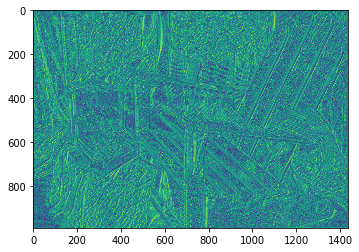

In [19]:
plt.imshow(tf.image.per_image_standardization(features)[0, :, :, 30])

In [21]:
model.save_weights("weights/mccnn")

In [22]:
model.load_weights('weights/mccnn')

In [23]:
test_image.ndim

3

In [ ]:
features.n